Önceki not defterinde ([TensorFlow'da NLP temelleri](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb)), bazı temel doğal dil işleme kavramlarını inceledik. Bunların başlıcaları **tokenization** (kelimeleri sayılara çevirme) ve **create embeddings** (kelimelerin sayısal temsilini oluşturma).

Bu projede öğrendiklerimizi pratiğe dökeceğiz.

Daha spesifik olarak, 2017 makalesinin arkasındaki derin öğrenme modelini kopyalayacağız [*PubMed 200k RCT: Tıbbi Özetlerde Sıralı Cümle Sınıflandırması için bir Veri Kümesi*](https://arxiv.org/abs/1710.06071).

Yayınlandığında, makale ~200.000 etiketli Randomized Controlled Trial (RCT) özetlerinden oluşan PubMed 200k RCT adlı yeni bir veri seti sundu.

Veri kümesinin amacı, NLP modellerinin sıralı sırada görünen cümleleri sınıflandırma yeteneğini keşfetmekti. Başka bir deyişle, bir RCT'nin özeti verildiğinde, her bir cümle özette nasıl bir rol oynar?

![Skimlit örnek girişler ve çıkışlar](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

### Model Input

Örneğin, aşağıdaki girdiyi alan bir NLP modelini eğitebilir miyiz (not: aşağıdaki örnekte tüm sayısal semboller "@" ile değiştirilmiştir):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model Output

Yukarıda ki input değeri aşağıdaki çıktıyı döndürür:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Sorun

Yayınlanan RKÇ makalelerinin sayısı artmaya devam ediyor, yapılandırılmış özetleri olmayanların okunması zor olabilir ve dolayısıyla literatürde ilerleyen araştırmacıları yavaşlatabilir.

 
### Çözüm

Soyut cümleleri oynadıkları role göre sınıflandırmak için bir NLP modeli oluşturun (ör. amaç, yöntemler, sonuçlar, vb.), araştırmacıların literatüre göz atmasını (dolayısıyla SkimLit 🤓🔥) ve gerektiğinde daha derine dalmasını sağlayın.

> 📖 **Kaynaklar:** Bu not defterindeki kodu gözden geçirmeden önce, ne yapacağımıza dair bir arka plan almak isteyebilirsiniz. Bunu yapmak için bir (veya iki) saatinizi aşağıdaki makaleleri gözden geçirin ve ardından bu not defterine geri dönün:
1. Verilerimizin geldiği yer: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. Modelimizin nereden geldiği: [*Neural networks for joint sentence classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).


## Amacımız ne?

NLP'nin temelleri yazısında öğrendiklerimizi kullanma zamanı geldi Bu eğitimde şimdiye kadarki en büyük NLP modelimizi oluşturacağız.

* Bir metin veri kümesi indirme ([GitHub'dan PubMed RCT200k](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Verilerimizi modellemeye hazırlamak için bir ön işleme fonksiyonu yazma
* Bir dizi modelleme deneyi kurma
   * Temel oluşturma (TF-IDF sınıflandırıcı)
   * Farklı kombinasyonlara sahip derin modeller: token embeddings, character embeddings, pretrained embeddings, positional embeddings
* İlk multimodal modelimizi oluşturma (birden fazla veri input türü alarak)
   * Model mimarisini https://arxiv.org/pdf/1612.05251.pdf adresinden çoğaltma
* En yanlış tahminleri bulma
* Vahşi doğadan PubMed özetleri hakkında tahminlerde bulunma

## Veri Alma

Bir model oluşturmaya başlamadan önce PubMed 200k RCT veri setini indirmemiz gerekiyor.

Makalenin yazarları olağanüstü bir nezaket göstererek araştırmaları için kullandıkları verileri .txt dosyaları biçiminde [GitHub'da](https://github.com/Franck-Dernoncourt/) herkese açık olarak ve ücretsiz olarak kullanılabilir hale getirdiler. pubmed-rct).

Bunları `git klonu https://github.com/Franck-Dernoncourt/pubmed-rct` kullanarak yerel dizinimize kopyalayabiliriz.

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


İndirilen havuzun içeriğini kontrol ederken, dört klasör olduğunu görebilirsiniz.

Her biri, PubMed 200k RCT veri setinin farklı bir sürümünü içerir.

GitHub sayfasındaki [README dosyasına](https://github.com/Franck-Dernoncourt/pubmed-rct) baktığımızda aşağıdaki bilgileri alıyoruz:
* PubMed 20k, PubMed 200k'nin bir alt kümesidir. Yani, PubMed 20k'de bulunan herhangi bir özet, PubMed 200k'de de mevcuttur.
* `PubMed_200k_RCT`, `PubMed_200k_RCT_numbers_replaced_with_at_sign` ile aynıdır, ancak ikincisinde tüm sayılar `@` ile değiştirilmiştir. (`PubMed_20k_RCT` ve `PubMed_20k_RCT_numbers_replaced_with_at_sign` için aynı).
* Github dosya boyutu limiti 100 MiB olduğu için. `PubMed_200k_RCT\train.7z` ve `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip` dosyalarını sıkıştırmamız gerekti. `train.7z` dosyasını açmak için Windows'ta 7-Zip, Mac OS X'te Keka veya Linux'ta p7zip kullanabilirsiniz.

Başlangıç ​​olarak, odaklanacağımız veri kümesi `PubMed_20k_RCT_numbers_replaced_with_at_sign`.

Neden bu?

200 bin veri kümesinin tamamıyla çalışmak yerine, daha küçük bir alt kümeyle başlayarak deneylerimizi hızlı tutacağız. Dosya içeriğini kontrol edelim.

In [2]:
# PubMed_20K veri setinde hangi dosyaların olduğunu kontrol edelim
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


Güzel, görünüşe göre üç ayrı metin dosyamız var:
* `train.txt`  - eğitim örnekleri.
* `dev.txt` - dev, doğrulama kümesinin başka bir adı olan geliştirme kümesinin kısaltmasıdır (bizim durumumuzda, doğrulama kümemiz olarak bu dosyayı kullanacağız ve buna atıfta bulunacağız).
* `test.txt` - test örnekleri.

Her seferinde hedef dizinimize dosya yolunu yazarak kendimizi kurtarmak için, onu bir değişkene çevirelim.

In [3]:
# 20k veri setini kullanarak başlayalım
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [4]:
# Hedef dizindeki tüm dosya adlarını kontrol edelim
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Verileri ön işleme

Tamam, şimdi biraz metin verisi indirdik, sence onu modellemeye hazır mıyız? Verileri indirdik ama henüz bakmadık bile. Herhangi bir yeni veri kümesine aşina olmanın sloganı nedir? Görselleştirme.

Derin öğrenme modellerimiz için verilerimizi nasıl hazırlamamız gerektiğini anlamak ve aşina olmak için görselleştirmemiz gerekiyor. Verilerimiz metin dosyaları biçiminde olduğundan, bir hedef dosyadaki satırların her birini okumak için bir kod yazalım.

In [5]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

Pekala, bir metin dosyasının dosya yolunu alan, onu açan, satırların her birini okuyan ve onları döndüren get_lines() adında küçük bir fonksiyonumuz var.

Bunu eğitim verileri üzerinde deneyelim (train.txt).

In [6]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] 

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Eğitim metin dosyasındaki satırları okumak, farklı soyut örnekleri içeren bir dizi listesi, bir örnekteki cümleler ve cümlenin özette oynadığı rol ile sonuçlanır.

Her cümlenin rolü, her satırın başına bir sekme (`\t`) ile ayrılmış olarak eklenir ve her cümle yeni bir satırla (`\n`) biter.

Farklı özetler, özet kimlikleri (`###` ile başlayan satırlar) ve yeni satırlar (`\n`) ile ayrılır.

Bunu bilerek, örneklerimizi gelecekteki makine öğrenimi modelimize eğitim verisi olarak geçmeye hazır hale getirmek için yapmamız gereken birkaç adım var gibi görünüyor.

Aşağıdaki adımları gerçekleştirmek için bir fonksiyon yazalım:
* Soyut örneklerden oluşan bir hedef dosya alın.
* Hedef dosyadaki satırları okuyun.
* Hedef dosyadaki her satır için:
  * Satır `###' ile başlıyorsa, bunu bir özet kimliği ve yeni bir özetin başlangıcı olarak işaretleyin.
    * Bir örnekteki satır sayısının sayısını tutun.
  * Satır `\n' ile başlıyorsa, soyut bir örneğin sonu olarak işaretleyin.
    * Bir örnekteki toplam satırların sayısını tutun.
  * Satırın etiketi olarak \t'den önceki metni kaydedin.
  * \t'den sonraki metni satırın metni olarak kaydedin.
* Hedef metin dosyasındaki tüm satırları, anahtar/değer çiftlerini içeren bir sözlük listesi olarak döndürün:
  * `"line_number"` - satırın özetteki konumu (ör. `3`).
  * `"target"` - özetteki satırın rolü (ör. "HEDEF").
  * `"text"` - özetteki satırın metni.
  * `"total_lines"` - soyut bir örnekteki toplam satırlar (ör. "14").
* Özet ID'ler ve yeni satırlar, döndürülen önceden işlenmiş verilerden çıkarılmalıdır.

Örnek:

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [7]:
def preprocess_text_with_line_numbers(filename):
  """Abstract satır verilerinin sözlüklerinin bir listesini döndürür.

  Dosya adını alır, içeriğini okur ve her satırda hedef etiketi, 
  cümlenin metni, mevcut özette kaç cümle olduğu ve hedef satırın 
  hangi cümle numarası olduğu gibi şeyleri çıkararak sıralar.
  
  Args:
      filename: satır verilerini okumak ve çıkarmak için hedef metin 
                dosyasının bir dizesi.

  Returns:
     Her biri bir özetten bir satır, satır etiketi, özetteki satır konumu 
     ve özette satırın geldiği toplam satır sayısını içeren bir sözlük 
     listesi. Örneğin:
      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are 
                kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # dosya adından tüm satırları al
  abstract_lines = "" # boş bir abstract oluştur
  abstract_samples = [] # boş bir abstract listesi oluştur
  
  # Hedef dosyadaki her satırda dolaşın
  for line in input_lines:
    if line.startswith("###"): # satırın bir kimlik satırı olup olmadığını kontrol edin
      abstract_id = line
      abstract_lines = "" # abstract dizeyi sıfırla
    elif line.isspace(): # satırın yeni bir satır olup olmadığını kontrol edin
      abstract_line_split = abstract_lines.splitlines() # Abstractı ayrı satırlara bölme

      # Abstracta her satırı yineleyin ve aynı anda sayın
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # boş bir dict oluştur
        target_text_split = abstract_line.split("\t") # metinden hedef etiketi ayır
        line_data["target"] = target_text_split[0] # hedef etiketi al
        line_data["text"] = target_text_split[1].lower() # hedef metni al ve indir
        line_data["line_number"] = abstract_line_number # Özette çizgi hangi sayı doğrusunda görünüyor?
        line_data["total_lines"] = len(abstract_line_split) - 1 # abstracta toplam kaç satır var? (0'dan başla)
        abstract_samples.append(line_data) # abstract örnekler listesine satır verileri ekle
    
    else: # yukarıdaki koşullar yerine getirilmezse, satır etiketli bir cümle içerir
      abstract_lines += line
  
  return abstract_samples

Güzel! Bu iyi görünen bir işlev. RCT 20k veri setlerimizin her birini önceden işlemek için kullanalım.

In [8]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 553 ms, sys: 141 ms, total: 694 ms
Wall time: 702 ms


Eğitim örneklerimiz nasıl görünüyor?

In [9]:
# Eğitim verilerimizin ilk özetini kontrol edelim
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

Harika! Görünüşe göre `preprocess_text_with_line_numbers()` işlevimiz harika çalıştı.

Sözlük listemizi `Pandas DataFrame`'lerine dönüştürerek onları daha iyi görselleştirmeye ne dersiniz?

In [10]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


Artık verilerimiz DataFrame formunda, üzerinde bazı veri analizleri yapabiliriz.

In [11]:
# Train verilerinde etiketlerin dağılımı
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

OBJECTIVE etiketine sahip cümleler en az yaygın olanlardır.
Abstract uzunluklarımızın dağılımını kontrol etmeye ne dersiniz?

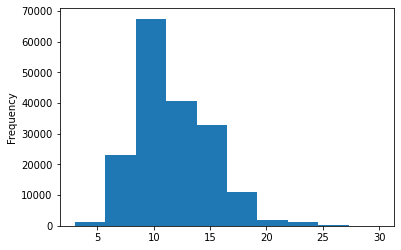

In [12]:
train_df.total_lines.plot.hist();

Özetlerin çoğu 7 ila 15 cümle uzunluğunda gibi görünüyor.

Bir modeli eğittiğimizde veya görünmeyen örnekler üzerinde test ettiğimizde, sonuçlarımızın tuhaf olmadığından emin olmak için bunları kontrol etmek önemlidir.

### Cümle Listeleri

Derin öğrenme modelimizi oluşturduğumuzda, ana girdilerinden biri bir dizi listesi (bir özetin satırları) olacaktır.

Bunları, `"text"` sütunlarımızda `"tolist()"` yöntemini çağırarak DataFrame'lerimizden kolayca alabiliriz.

In [13]:
# Soyut metin satırlarını listelere dönüştürelim
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [14]:
# Eğitim cümlelerinin ilk 10 satırını görüntüleyelim
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Pekala, metin örneklerimizi ayırdık. Tahmin edebileceğiniz gibi, makine öğrenimi modellerimizde kullanmadan önce metni sayılara dönüştürmek için kod yazmamız gerekecek, bu kısma yakında geleceğiz.

## Sayısal Etiketleri Oluşturalım (ML modelleri sayısal etiketler gerektirir)

Hot ve label encoded bir etiket oluşturacağız.

Sadece etiketle kodlanmış encoded yapmakla kurtulabiliriz, ancak TensorFlow'un CategoricalCrossentropy kayıp işlevi bir hot encoded etikete sahip olmayı sever (bu, daha sonra tag smoothing kullanmamızı sağlar).

Etiketleri sayısal olarak kodlamak için Scikit-Learn'in [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) ve [`LabelEncoder`](http: //scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) sınıflarını kullanacağız.

In [15]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Training etiketlerinin nasıl göründüğünü kontrol edin
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label Encode Etiketleri

In [16]:
# Etiketleri ("OBJECTIVE" sütunları) ayıklayın ve bunları tam sayılara kodlayın
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Eğitim etiketlerinin nasıl göründüğünü kontrol edelim
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

Şimdi bir "LabelEncoder" örneğini eğittik, "classes_" özniteliğini kullanarak sınıf adlarını ve sınıfların sayısını alabiliriz.

In [17]:
# LabelEncoder örneğinden sınıf adlarını ve sınıf sayısını alalım
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Bir dizi model deneyi oluşturma

Verilerimizi yeniden işledik, bu yüzden şimdi gerçek makine öğrenimi tarzında, bir dizi modelleme deneyi kurmanın zamanı geldi.

*Tıbbi makale özetlerinde ortak cümle sınıflandırması için sinir ağları* bölümünde özetlenen dizi modelini kopyalamaya doğru ilerledikçe daha karmaşık modeller oluşturarak geçmeyi deneyeceğimiz bir puan elde etmek için basit bir temel model oluşturarak başlayacağız. (https://arxiv.org/pdf/1612.05251.pdf)

Her model için, onu eğitim verileri üzerinde eğiteceğiz ve doğrulama verileri üzerinde değerlendireceğiz.

## Model 0: Baseline

İlk modelimiz, [Scikit-Learn'in makine öğrenimi haritası](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) tarafından önerilen bir TF-IDF Multinomial Naive Bayes olacağız.

Bunu oluşturmak için, TF-IDF (terim frekans-ters belge frekansı) algoritmasını kullanarak soyut cümlelerimizi sayılara dönüştürmek için [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) sınıfını kullanan bir Scikit-Learn `Pipeline` oluşturacağız ve ardından cümlelerimizi, ['MultinomialNB'](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) agloritmasını kullanarak, sınıflandırmayı öğreneceğiz.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences, 
            y=train_labels_encoded);